## Coffee Sales Information 
This project provides information on coffee sales based on coffee type, the amount spent, and other related factors.

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading The Dataset

In [15]:
df = pd.read_csv(r'C:\Users\Megha Nair\OneDrive\Desktop\projects to upload in github\Coffee Sales Information\Coffe_sales.csv')
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


## Analysis of Data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


## Exploratory Data Analysis EDA

<Axes: xlabel='money', ylabel='count'>

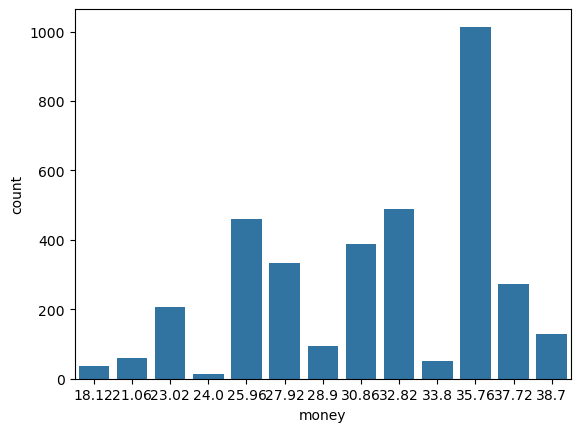

In [19]:
sns.countplot(x = 'money', data = df)

In [20]:
df.columns

Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day',
       'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time'],
      dtype='object')

<Axes: xlabel='hour_of_day', ylabel='count'>

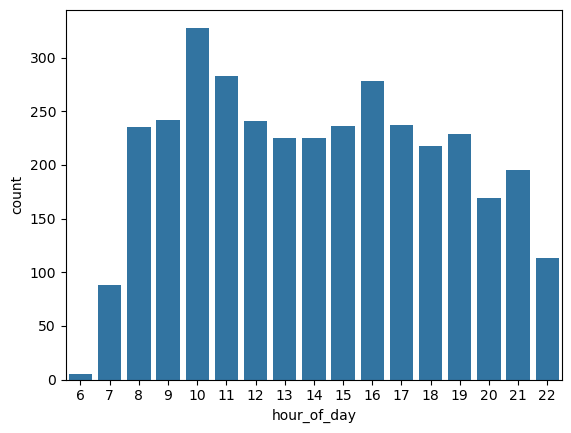

In [21]:
sns.countplot(x = 'hour_of_day', data = df)

<Axes: xlabel='coffee_name', ylabel='count'>

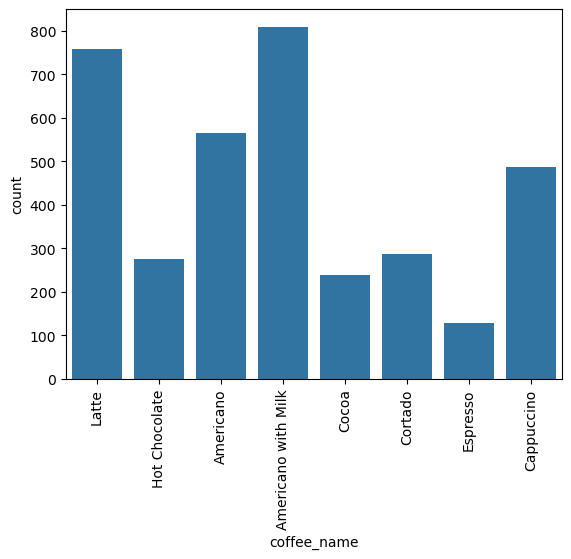

In [22]:
plt.xticks(rotation = 90)
sns.countplot(x = 'coffee_name', data = df)

<Axes: xlabel='Time_of_Day', ylabel='count'>

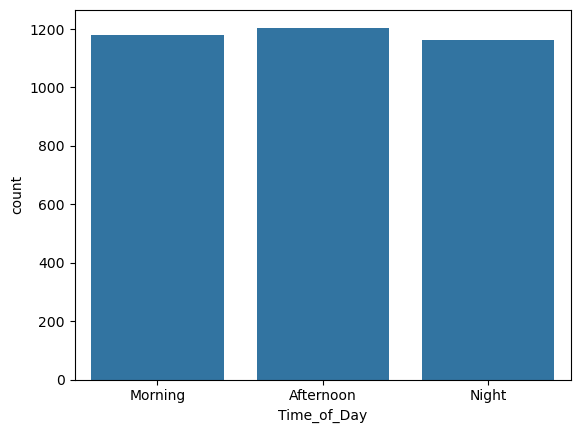

In [23]:
sns.countplot(x =  'Time_of_Day', data = df)

<Axes: xlabel='Weekday', ylabel='count'>

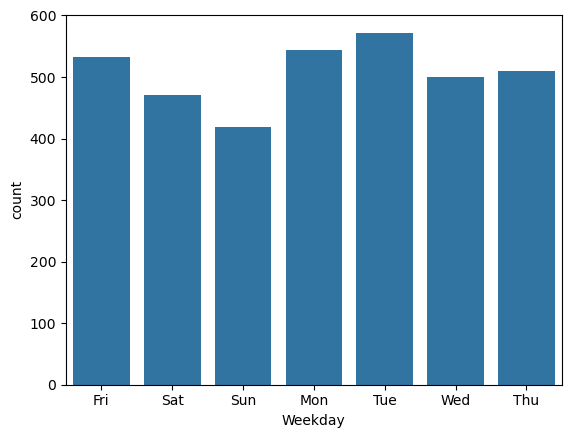

In [24]:
sns.countplot(x = 'Weekday', data = df)

<Axes: xlabel='Month_name', ylabel='count'>

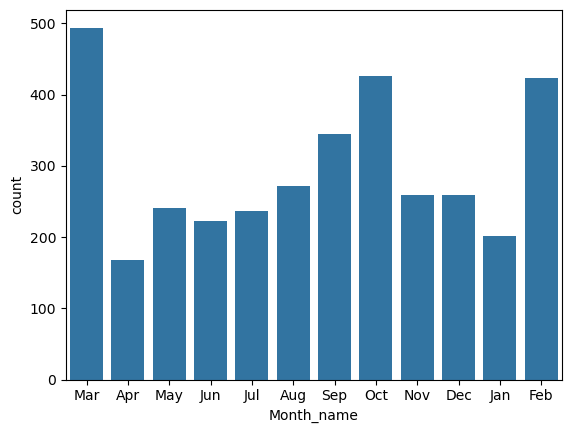

In [25]:
sns.countplot(x = 'Month_name', data = df)

<Axes: xlabel='Weekdaysort', ylabel='count'>

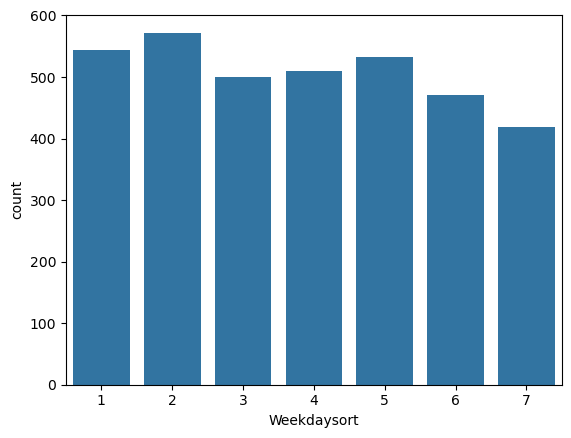

In [26]:
sns.countplot(x = 'Weekdaysort', data = df)

<Axes: xlabel='Monthsort', ylabel='count'>

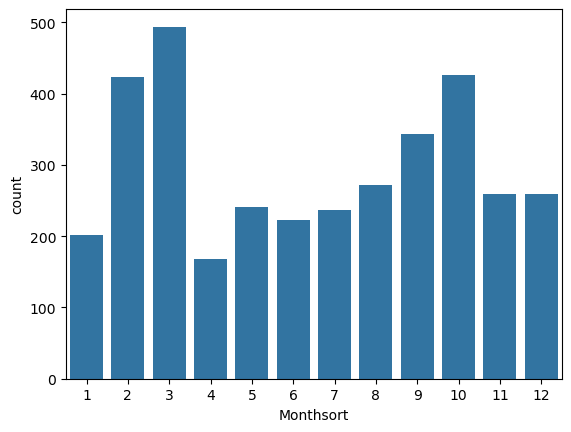

In [27]:
sns.countplot(x = 'Monthsort', data = df)

<Axes: xlabel='hour_of_day', ylabel='money'>

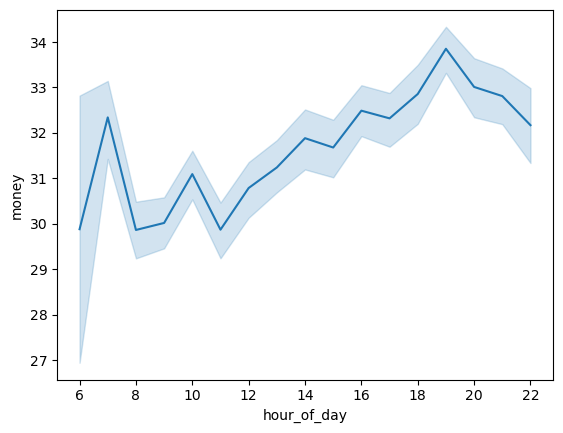

In [28]:
sns.lineplot(x = 'hour_of_day', y = 'money', data = df)

<Axes: xlabel='coffee_name', ylabel='money'>

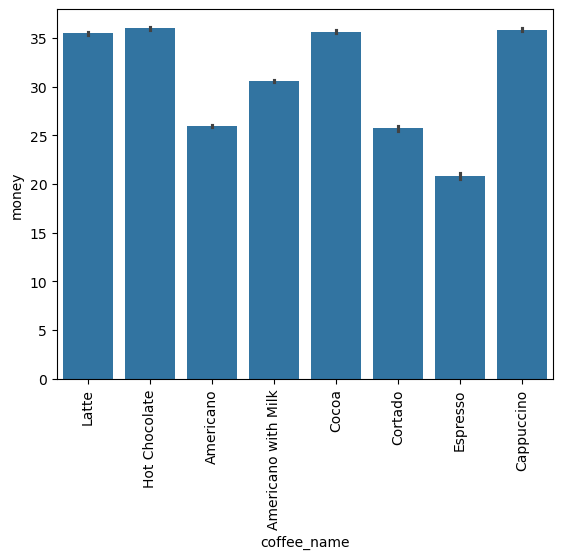

In [29]:
plt.xticks(rotation = 90)
sns.barplot(x = 'coffee_name',y= 'money',data = df)

<Axes: xlabel='Time_of_Day', ylabel='money'>

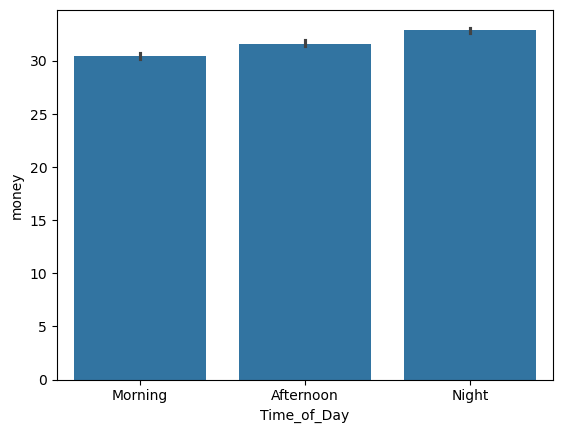

In [30]:
sns.barplot(x = 'Time_of_Day',y= 'money', data = df)

<Axes: xlabel='Weekday', ylabel='money'>

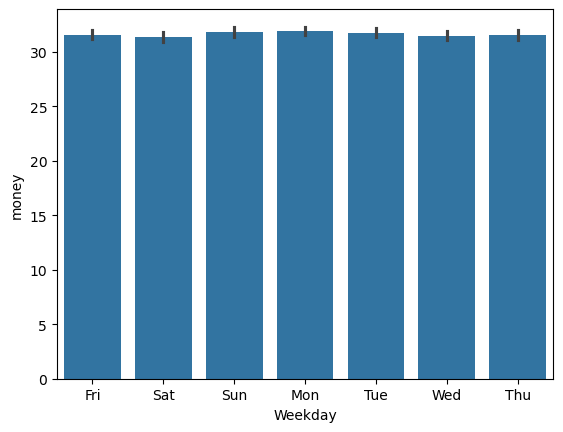

In [31]:
sns.barplot(x = 'Weekday',y= 'money', data = df)

<Axes: xlabel='Month_name', ylabel='money'>

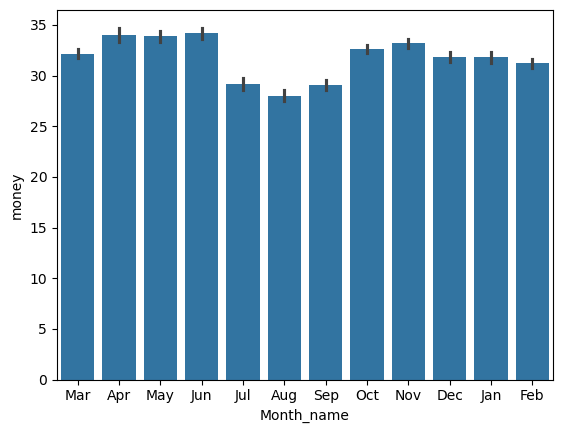

In [32]:
sns.barplot(x = 'Month_name',y= 'money', data = df)

<Axes: xlabel='Weekdaysort', ylabel='money'>

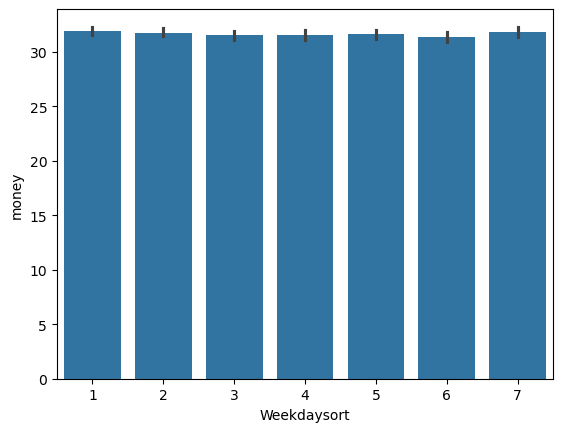

In [33]:
sns.barplot(x = 'Weekdaysort',y= 'money', data = df)

<Axes: xlabel='Monthsort', ylabel='money'>

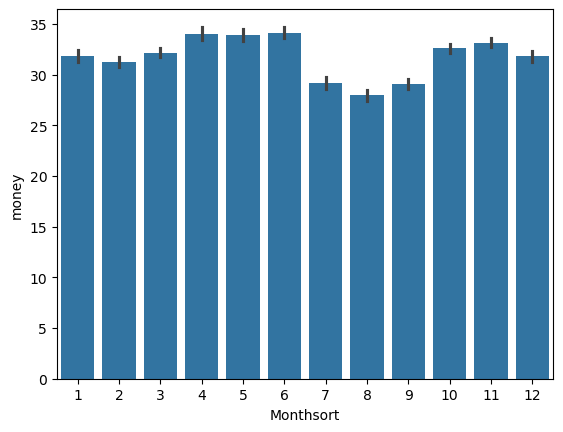

In [34]:
sns.barplot(x = 'Monthsort',y= 'money', data = df)

In [35]:
df.drop('cash_type', axis = 1, inplace = True)

**Converting Categorical Data to Numberical Data**

In [37]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for column in df.columns :
    df[column] = LE.fit_transform(df[column])

<Axes: >

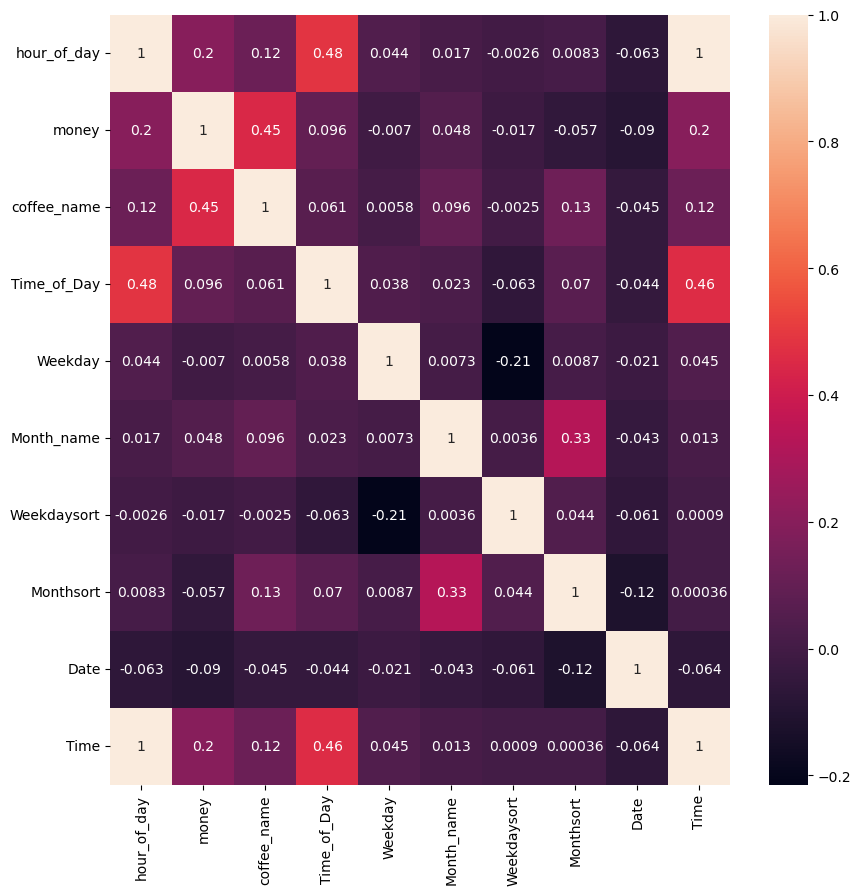

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True)

## Modeling

In [40]:
final_res=[]

In [41]:
x = df.drop('money', axis =1)
y = df.money

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2837, 9) (710, 9) (2837,) (710,)


In [43]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [44]:
y_pred_LR = LR.predict(x_test)

In [45]:
from sklearn.metrics import r2_score,mean_absolute_error

In [46]:
print('Linear Regression:')
print('R2 Score :',r2_score(y_test,y_pred_LR))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred_LR))
r2_score_LR = r2_score(y_test,y_pred_LR)
final_res.append(r2_score_LR)

Linear Regression:
R2 Score : 0.2873347386895797
Mean Absolute Error : 1.9680545942954377


In [47]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [48]:
y_pred_DT = DT.predict(x_test)

In [49]:
print('Decision Tree :')
print('R2 Score :',r2_score(y_test,y_pred_DT))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred_DT))
r2_score_DT = r2_score(y_test,y_pred_DT)
final_res.append(r2_score_DT)

Decision Tree :
R2 Score : 0.9950617638869343
Mean Absolute Error : 0.016901408450704224


In [50]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor()

In [51]:
y_pred_RF = RF.predict(x_test)

In [52]:
print('Random Forest Regressor :')
print('R2 Score :',r2_score(y_test,y_pred_RF))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred_RF))
r2_score_RF = r2_score(y_test,y_pred_RF)
final_res.append(r2_score_RF)

Random Forest Regressor :
R2 Score : 0.9975958855915021
Mean Absolute Error : 0.014718309859154921


In [53]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [54]:
y_pred_xgb = xgb.predict(x_test)

In [55]:
print('XGBoost :')
print('R2 Score :', r2_score(y_test,y_pred_xgb))
print('Mean Absolute Error :', mean_absolute_error(y_test,y_pred_xgb))
r2_score_xgb = r2_score(y_test,y_pred_xgb)
final_res.append(r2_score_xgb)

XGBoost :
R2 Score : 0.9945596088867587
Mean Absolute Error : 0.021164120530736165


In [56]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [57]:

y_pred_KNN = KNN.predict(x_test)

In [58]:
print('K-Nearest Neighbors :')
print('R2 Score :', r2_score(y_test,y_pred_KNN))
print(' Mean Absolute Error :', mean_absolute_error(y_test,y_pred_KNN))
r2_score_KNN = r2_score(y_test,y_pred_KNN)
final_res.append(r2_score_KNN)

K-Nearest Neighbors :
R2 Score : 0.10592247525723442
 Mean Absolute Error : 2.269014084507042


## Comparing Algorithm

Text(0.5, 1.0, 'R2 Score')

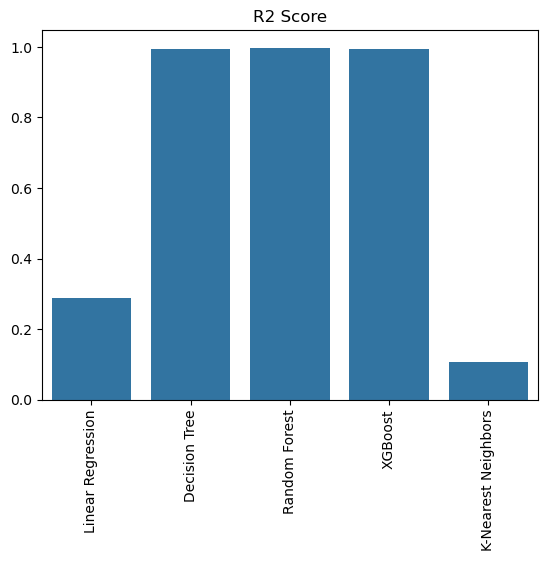

In [60]:
plt.xticks(rotation = 90)
sns.barplot(x = ['Linear Regression','Decision Tree', 'Random Forest','XGBoost','K-Nearest Neighbors'], y = [r2_score(y_test,y_pred_LR),r2_score(y_test,y_pred_DT),r2_score(y_test,y_pred_RF),r2_score(y_test,y_pred_xgb),r2_score(y_test,y_pred_KNN)]).set_title('R2 Score')

In [61]:
final=np.array(final_res)
result=final.reshape(-1,1)
columns=['R2 Score']
index=['Linear Regression','Decision Tree', 'Random Forest','XGBoost','K-Nearest Neighbors']
final_result=pd.DataFrame(result,index=index,columns=columns)
final_result.sort_values(by='R2 Score', ascending=False)

,R2 Score
Random Forest,0.997596
Decision Tree,0.995062
XGBoost,0.994560
Linear Regression,0.287335
K-Nearest Neighbors,0.105922


## Hyperparameter optimization

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [64]:
rf = RandomForestRegressor(random_state=42)

param_rf = {
    'n_estimators': [100, 200, 300, 500],     # Number of trees
    'max_depth': [None, 10, 20, 30, 40],      # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],          # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],            # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider per split
    'bootstrap': [True, False]                # Whether bootstrap samples are used
}

rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_rf,
    n_iter=10,       # number of random combinations to try
    cv=3,            # 3-fold cross-validation
    scoring='r2',    # optimize for R²
    n_jobs=-1,       # use all cores
    random_state=42
)

# 4️⃣ Fit the model
rf_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='r2')

In [65]:
y_pred_rf = rf_search.predict(x_test) 

In [66]:
print('R2 Score: ',r2_score(y_test,y_pred_rf))
print('Mean Absolute Score: ',mean_absolute_error(y_test,y_pred_rf))
r2_score_model_rf = r2_score(y_test,y_pred_rf)
mae_model_rf = mean_absolute_error(y_test,y_pred_rf)

R2 Score:  0.9750035047565878
Mean Absolute Score:  0.2653239436619718


In [67]:
dt = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}

grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid,
                       cv=5, n_jobs=-1, scoring='r2')

grid_dt.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [None, 5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [68]:
y_pred_dt = grid_dt.predict(x_test) 

In [69]:
print('R2 Score: ',r2_score(y_test,y_pred_dt))
print('Mean Absolute Score: ',mean_absolute_error(y_test,y_pred_dt))
r2_score_model_dt = r2_score(y_test,y_pred_dt)
mae_model_dt = mean_absolute_error(y_test,y_pred_dt)

R2 Score:  0.9949794599517165
Mean Absolute Score:  0.018309859154929577


In [70]:
xgb1 = XGBRegressor(random_state=42)
param_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb1,
    param_distributions=param_xgb,
    n_iter=10,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

xgb_search.fit(x_train, y_train)


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=42,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='r2')

In [71]:
y_pred_xgb = xgb_search.predict(x_test) 

In [72]:
print('R2 Score: ',r2_score(y_test,y_pred_xgb))
print('Mean Absolute Score: ',mean_absolute_error(y_test,y_pred_xgb))
r2_score_model_xgb = r2_score(y_test,y_pred_xgb)
mae_model_xgb = mean_absolute_error(y_test,y_pred_xgb)

R2 Score:  0.9951825696973238
Mean Absolute Score:  0.021252874129625614


In [73]:
models_score = pd.DataFrame({'R2 Score':[r2_score_model_xgb,r2_score_model_rf,r2_score_model_dt],'Mean Absolute Error':[mae_model_xgb,mae_model_rf,mae_model_dt]}, index=['XGBoost','Random Forest','Decision Tree'])
models_score.sort_values(by='R2 Score', ascending=False)

,R2 Score,Mean Absolute Error
XGBoost,0.995183,0.021253
Decision Tree,0.994979,0.018310
Random Forest,0.975004,0.265324


## Conclusion

After the parameter tuning process with XGBoosting,Decision Tree and Random Forest I decided to select the XGBoost Model as it gives Highest R2 Score.